# Credit Card Clustering
Credit card clustering is the task of grouping credit card holders based on balance, purchases and credit limit.

Dataset: https://statso.io/customer-segmentation-case-study/

Example Solution: https://thecleverprogrammer.com/2022/10/03/credit-card-clustering-with-machine-learning/

Hugging Face: https://huggingface.co/spaces/alperugurcan/credit-card-clustering

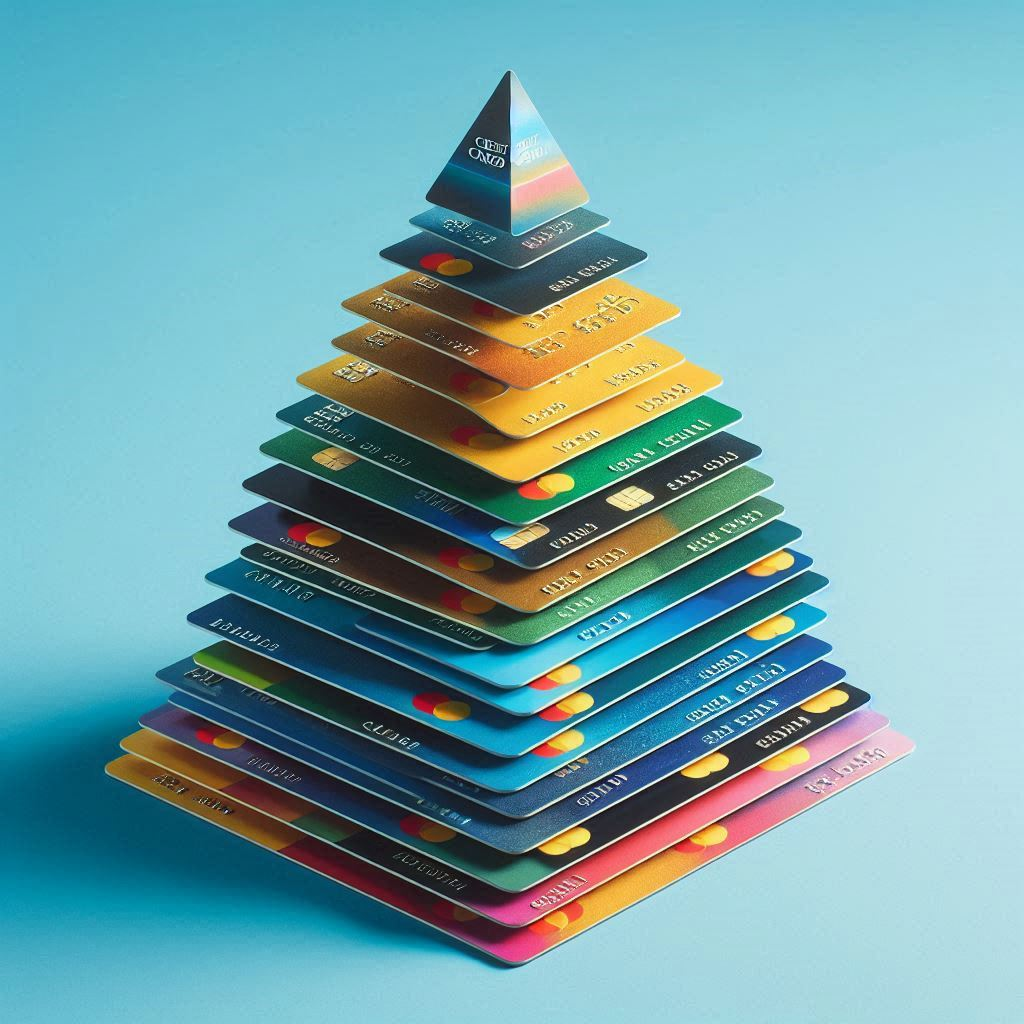

# 1. Exploratory Data Analysis (EDA) and Data Preprocessing

In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("CC GENERAL.csv")

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.isnull().sum().any()

True

In [7]:
df = df.dropna()

In [8]:
df.describe(include="all")

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
unique,8636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,NaN,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,NaN,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,NaN,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,NaN,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000


In [9]:
df = df[["BALANCE", "PURCHASES", "CREDIT_LIMIT"]]

In [13]:
df2 = StandardScaler().fit_transform(df)

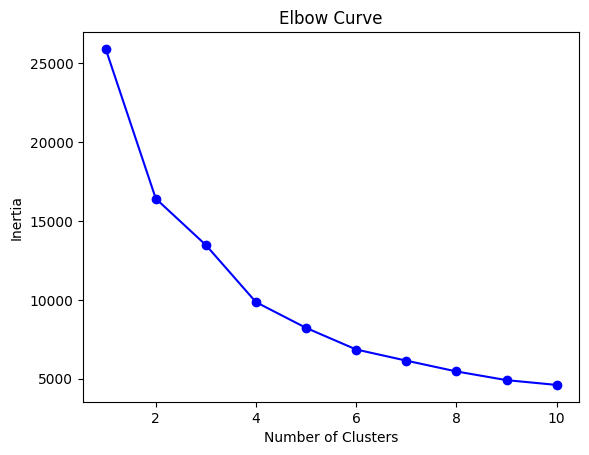

The optimal number of clusters is: 4


In [26]:
inertia = []
K = range(1, 11)  # Test with up to 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df2)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

# Use kneed to find the optimal number of clusters (elbow point)
kneedle = KneeLocator(K, inertia, curve="convex", direction="decreasing")
optimal_k = kneedle.elbow

print(f"The optimal number of clusters is: {optimal_k}")

## 2. Train the Model

In [28]:
df.columns

Index(['BALANCE', 'PURCHASES', 'CREDIT_LIMIT'], dtype='object')

In [29]:
df2 = pd.DataFrame(df2, columns=['BALANCE', 'PURCHASES', 'CREDIT_LIMIT'])
clusters = KMeans(n_clusters=optimal_k, random_state=42).fit_predict(df2)

# Add cluster labels to the original dataset
df2['Cluster'] = clusters

# Show the updated dataset with clusters
df2.head()

,BALANCE,PURCHASES,CREDIT_LIMIT,Cluster
0,-0.744625,-0.429184,-0.962575,1
1,0.764152,-0.473208,0.677204,0
2,0.426602,-0.116413,0.813852,0
3,-0.373910,-0.465825,-0.907916,1
4,0.099551,0.142062,-0.743938,1


In [30]:
print(f'df2 shape: {df2.shape}')
print(f'clusters shape: {clusters.shape}')

df2 shape: (8636, 4)
clusters shape: (8636,)


In [31]:
df2.columns = df2.columns.str.upper()

In [32]:
df2.head()

,BALANCE,PURCHASES,CREDIT_LIMIT,CLUSTER
0,-0.744625,-0.429184,-0.962575,1
1,0.764152,-0.473208,0.677204,0
2,0.426602,-0.116413,0.813852,0
3,-0.373910,-0.465825,-0.907916,1
4,0.099551,0.142062,-0.743938,1


In [37]:
silhouette_avg = silhouette_score(df2, clusters)
print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg}')

Silhouette Score for 4 clusters: 0.5317418629992975


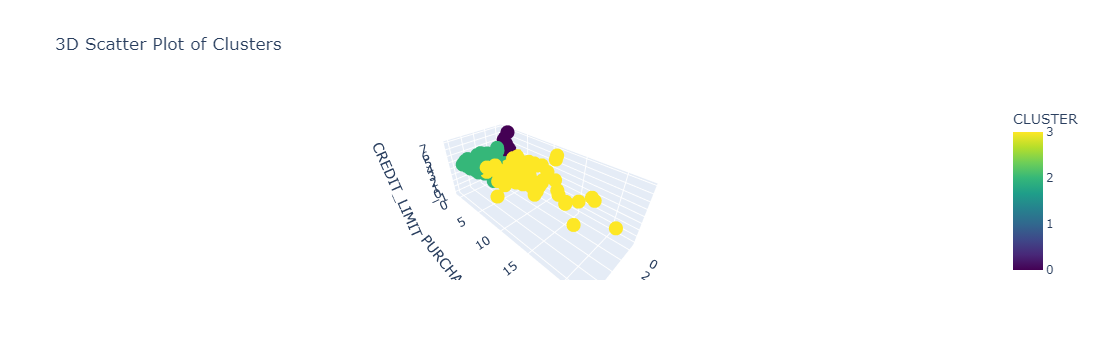

In [55]:
import plotly.express as px

# 3D scatter plot oluşturma
fig = px.scatter_3d(df2, 
                     x='BALANCE', 
                     y='PURCHASES', 
                     z='CREDIT_LIMIT', 
                     color='CLUSTER',  # Küme değerlerine göre renk ver
                     color_continuous_scale='Viridis',  # Renk skalası
                     title='3D Scatter Plot of Clusters')

# Eksen başlıklarını ayarlama
fig.update_layout(
    scene=dict(
        xaxis_title='BALANCE',
        yaxis_title='PURCHASES',
        zaxis_title='CREDIT_LIMIT'
    )
)

# Grafiği ekranda gösterme
fig.show()

In [57]:
df2.to_csv("your_data.csv")